<a href="https://colab.research.google.com/github/Sachin-Kr10/SDXL-Image-Generation/blob/main/SDXL_Turbo_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/517 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


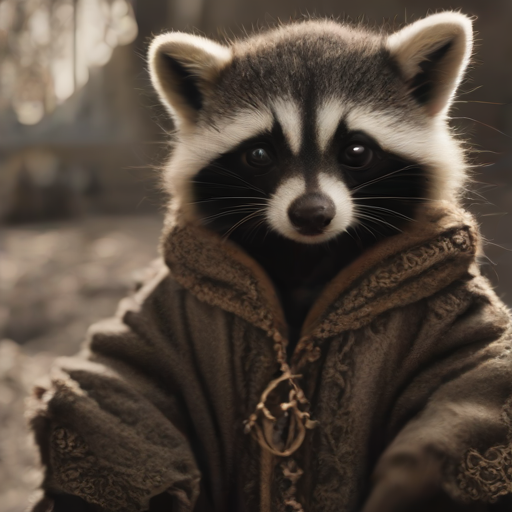

In [2]:
import torch
from diffusers import StableDiffusionXLPipeline

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16,
    variant="fp16"
).to(device)

pipe.set_progress_bar_config(disable=True)

prompt = "A cinematic shot of a baby racoon wearing an intricate italian priest robe."

image = pipe(
    prompt,
    num_inference_steps=1,
    guidance_scale=0.0
).images[0]

image


In [1]:
!pip install -q gradio diffusers torch transformers accelerate safetensors


import os
import torch
import gradio as gr

from diffusers import StableDiffusionXLPipeline


# Cache
CACHE_DIR = "/content/hf_cache"
os.makedirs(CACHE_DIR, exist_ok=True)

os.environ["HF_HOME"] = CACHE_DIR
os.environ["TRANSFORMERS_CACHE"] = CACHE_DIR


# Device
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using:", device)


# Load Model
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16,
    variant="fp16",
    cache_dir=CACHE_DIR
).to(device)

pipe.set_progress_bar_config(disable=True)


# Quality suffix
QUALITY_SUFFIX = (
    ", ultra realistic, highly detailed, sharp focus, "
    "8k uhd, dslr photography, soft natural lighting, "
    "perfect exposure, professional portrait, "
    "no blur, no noise, no artifacts, no distortion, "
    "no cropping, full frame, clear face, clean edges"
)


def generate(prompt):

    final_prompt = prompt + QUALITY_SUFFIX

    image = pipe(
        final_prompt,
        num_inference_steps=1,
        guidance_scale=0.0
    ).images[0]

    return image


# Gradio App
app = gr.Interface(
    fn=generate,
    inputs=gr.Textbox(placeholder="Enter prompt"),
    outputs=gr.Image(type="pil"),
    title="SDXL-Turbo Generator",
    description="Fast AI Image Generator"
)


app.launch(share=True)


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Using: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/517 [00:00<?, ?it/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bf720a02d74b85e5c4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
